## <div align="center"> LAB IS411 - Data Modelling </div>
## <div align="center"> Ujian Tengah Semester (UTS)</div>
#### <div align="center"> Semester Ganjil 2025/2026 </div>
---

In [1]:
studentName = "Farrelius Kevin"
studentNIM = "00000081783"
studentClass = "IS411 - A"
description = "Ujian Tengah Semester (UTS)"

print("Name \t\t:{}".format(studentName))
print("NIM \t\t:{}".format(studentNIM))
print("Class \t\t:{}\n".format(studentClass))
print(description)

Name 		:Farrelius Kevin
NIM 		:00000081783
Class 		:IS411 - A

Ujian Tengah Semester (UTS)


---

### Use the supporting dataset provided by `IS411_Data_Modelling_Data_Pendukung_UTS.csv` to answer all questions. 

#### Import Dataset Menjadi Dataframe

In [2]:
import pandas as pd

df = pd.read_csv("IS411_Data_Modelling_Data_Pendukung_UTS.csv")
df.head()

,NIM;ANGKATAN;SEMESTER;KODE_MK;NAMA_MK;SKS;NILAI;GRADE
0,10110310002;2010;1011;EM100;EM100 Dasar-dasar ...
1,10110310002;2010;1011;EM180;EM180 Matematika B...
2,10110310002;2010;1011;TI100;TI100 Algoritma da...
3,10110310002;2010;1011;TI101;TI101 Matematika D...
4,10110310002;2010;1011;TI110;TI110 Pengantar Te...


In [3]:
df = pd.read_csv("IS411_Data_Modelling_Data_Pendukung_UTS.csv", sep=';')
df.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


- Secara default, pandas.read_csv() menganggap `koma (,)` sebagai pemisah antar kolom (delimiter).
- Namun, pada kasus **file IS411_Data_Modelling_Data_Pendukung_UTS.csv**, menggunakan pemisah lain, seperti `titik koma (;) atau tab (\t)`.
- Akibatnya, Pandas membaca seluruh baris data sebagai satu kolom tunggal
- Oleh karena itu, ada penambahan kode `sep=';'` untuk memberitahu Pandas delimiter yang benar.

---

#### Informasi Jumlah Data Pada Dataset

In [4]:
df.shape

(30870, 8)

Penjelasan :

Total data yang ada pada dataset memiliki 30870 baris dengan 8 fitur / kolom

---

#### Informasi Nama Kolom dan Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


Penjelasan :

Dataset memiliki 3 Tipe data, yaitu:
- `int64`: kolom NIM, ANGKATAN, SEMESTER, SKS
- `float64`: kolom NILAI
- `object`: kolom KODE_MK, NAMA_MK, GRADE

---

### **1. Question 1: SUB-CLO012-2, Weight (25%)**
 
### Complete the missing values in the Grade column, using the following information:


#### Mengecek Missing Value

In [6]:
df.isnull().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
dtype: int64

#### Visualisasi Posisi Missing Value

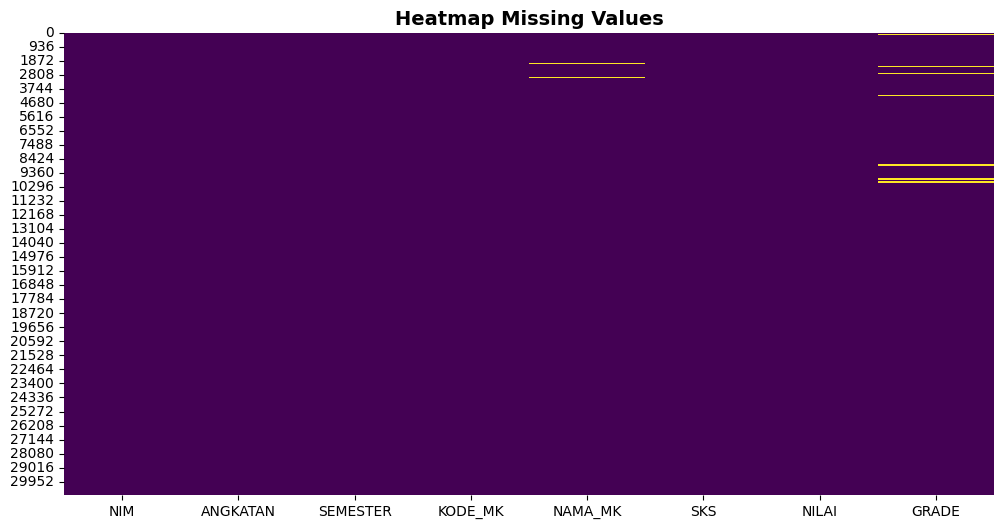

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(
 df.isnull(),
 cbar=False,
 cmap="viridis"
)

plt.title("Heatmap Missing Values", fontsize=14, fontweight="bold")
plt.show()

Penjelasan :

- Dari output diatas membuktikan **adanya missing value** pada beberapa kolom/fitur, yaitu kolom `NAMA_MK, NILAI, dan GRADE`.
- Garis Kuning pada visualisasi = Menandakan adanya missing value pada kolom/fitur tersebut.
- Oleh karena itu akan dilakukan penanganan untuk masalah missing value ini. 
- Sesuai perintah soal, kita akan melengkapi nilai yang hilang (Missing Values) di kolom GRADE berdasarkan NILAI (Score)

---

#### Penanganan Missing Value Kolom GRADE

1. Proses dimulai dengan membuat fungsi pemetaan nilai ke grade sesuai perintah soal.

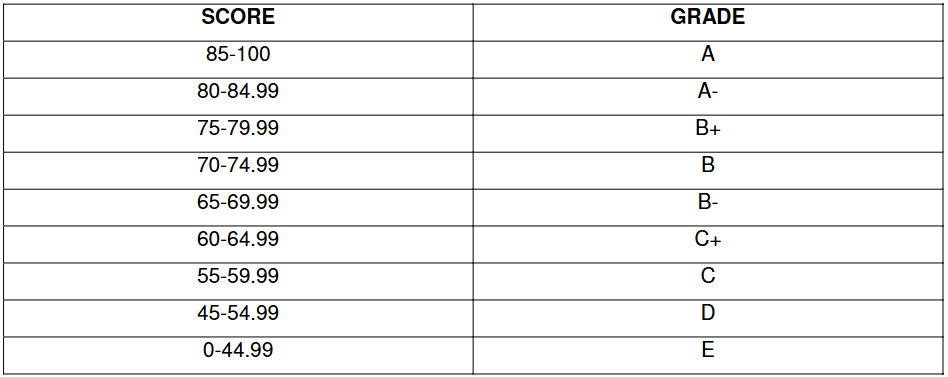

In [8]:
def score_to_grade(score):
    if pd.isnull(score): 
        return None
    elif score >= 85: return 'A'
    elif score >= 80: return 'A-'
    elif score >= 75: return 'B+'
    elif score >= 70: return 'B'
    elif score >= 65: return 'B-'
    elif score >= 60: return 'C+'
    elif score >= 55: return 'C'
    elif score >= 45: return 'D'
    else: return 'E'

2. Mengisi nilai GRADE kosong

In [9]:
df['GRADE'] = df.apply(
    lambda row: row['GRADE'] if pd.notnull(row['GRADE']) else score_to_grade(row['NILAI']), 
    axis=1
)

3. Mengecek Hasil Setelah Mengisi GRADE yang kosong

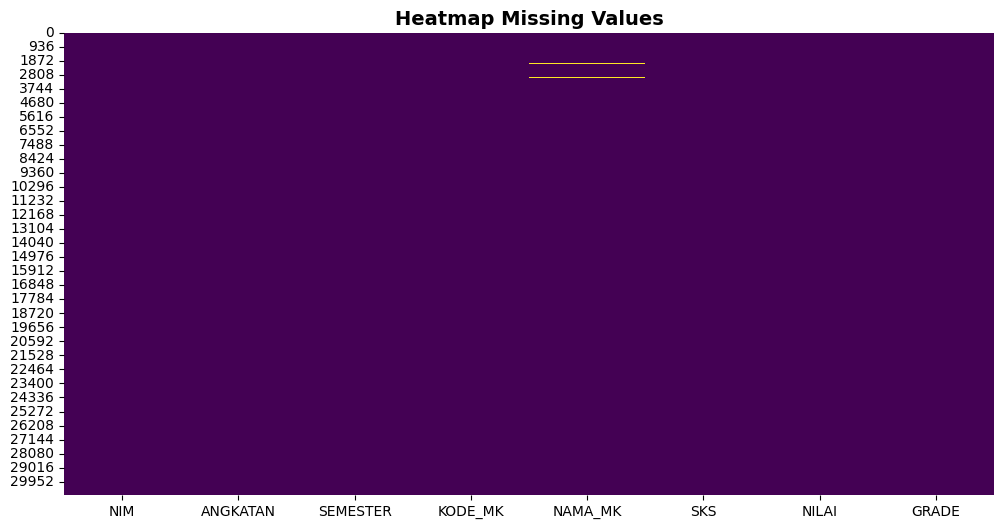

NIM          0
ANGKATAN     0
SEMESTER     0
KODE_MK      0
NAMA_MK     23
SKS          0
NILAI       12
GRADE        0
dtype: int64

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(
 df.isnull(),
 cbar=False,
 cmap="viridis"
)

plt.title("Heatmap Missing Values", fontsize=14, fontweight="bold")
plt.show()

df.isnull().sum()

Penjelasan :

- Dari hasil visualisasi dan output pengecekkan missing value, dapat disimpulkan penanganan missing value untuk kolom/fitur `'GRADE'` berhasil ditangani, karena telah menunjukkan angka 0 dan dari visualisasi heatmap tidak ada garis kuning pada kolom GRADE. 
- Missing value pada kolom GRADE berhasil diisi berdasarkan Pemetaan Nilai
- Garis Kuning Pada Visualisasi Heatmap = Menandakan adanya missing value pada kolom/fitur tersebut.

---

### **2. Question 2: SUB-CLO012-3, Weight (25%)**
 
### From the data, find the average score of each course, then display the highest mean of the grades and the lowest mean of the score! (Hint: Do grouping by course).


#### - Menghitung rata-rata NILAI per mata kuliah (COURSE)

In [11]:
avg_score_per_course = df.groupby('NAMA_MK')['NILAI'].mean().reset_index()
avg_score_per_course.head()

,NAMA_MK,NILAI
0,Administrasi Database 1,88.631579
1,Administrasi Database 2,90.775281
2,Agama,75.199181
3,Algoritma dan Pemrograman,64.125468
4,Algoritma dan Struktur Data,45.817259


Penjelasan :

Membuat grouping data per matkul menggunakan `.groupby` berdasarkan kolom NAMA_MK. Kemudian mengambil rata-rata NILAI per mata kuliah menggunakan `.mean()`.

---

#### - Mencari mata kuliah dengan nilai rata-rata tertinggi dan terendah

In [12]:
highest = avg_score_per_course.loc[avg_score_per_course['NILAI'].idxmax()]
lowest = avg_score_per_course.loc[avg_score_per_course['NILAI'].idxmin()]

In [13]:
print(f"Mata kuliah dengan nilai rata-rata tertinggi:")
print(f"{highest['NAMA_MK']} - {highest['NILAI']:.2f}")

print("\nMata kuliah dengan nilai rata-rata terendah:")
print(f"{lowest['NAMA_MK']} - {lowest['NILAI']:.2f}")


Mata kuliah dengan nilai rata-rata tertinggi:
SK632 Jaringan Komputer Terapan 2 - 98.00

Mata kuliah dengan nilai rata-rata terendah:
Algoritma dan Struktur Data - 45.82


Penjelasan :

Proses mencari mata kuliah dengan nilai rata-rata tertinggi dan terendah :

- Menggunakan `.idxmax()` untuk mencari index di mana kolom 'NILAI' nya memiliki nilai tertinggi. Kemudian `.loc[...]` digunakan untuk mengambil seluruh baris tersebut dari DataFrame. Kemudian hasilnya disimpan ke variabel `highest` untuk ditampilkan.

- Begitupula dengan `.idxmin()` untuk mencari index di mana kolom 'NILAI' nya memiliki nilai terendah. Kemudian `.loc[...]` digunakan untuk mengambil seluruh baris tersebut dari DataFrame. Kemudian hasilnya disimpan ke variabel `lowest` untuk ditampilkan.

---

#### - Visualisasi Top 10 Mata Kuliah dengan nilai rata-rata tertinggi `(Tambahan)`

1. Import Library Visualisasi

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

2. Mengurutkan data rata-rata nilai tiap mata kuliah, kemudian memilih 10 tertinggi

In [15]:
avg_score_per_course_sorted = avg_score_per_course.sort_values(by='NILAI', ascending=False)
top10 = avg_score_per_course_sorted.head(10)

3. Membuat dan Menampilkan Grafik Batang

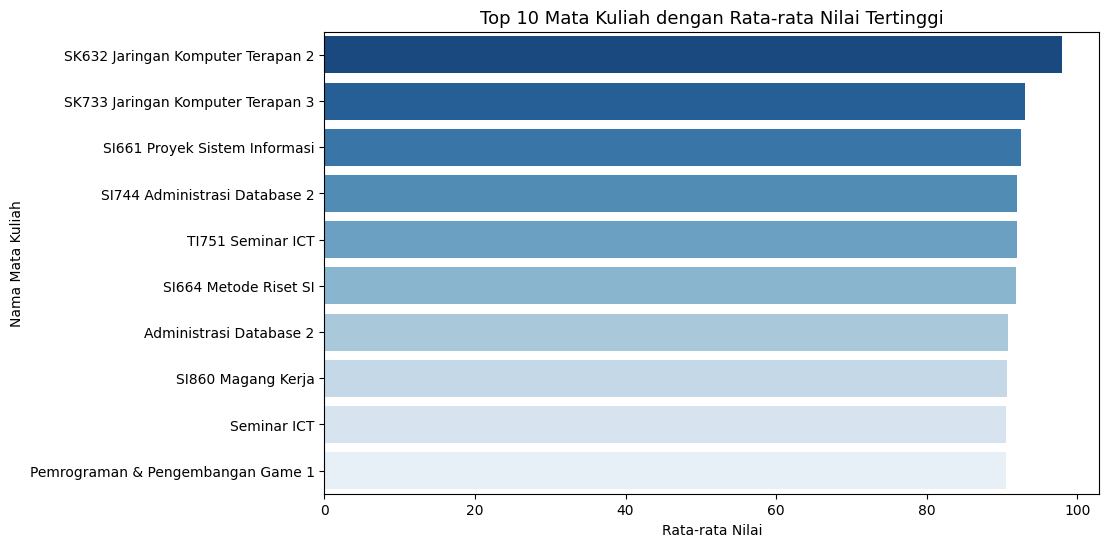

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10, 
    y='NAMA_MK', 
    x='NILAI', 
    hue='NAMA_MK',
    dodge=False,
    palette='Blues_r', 
)
plt.title('Top 10 Mata Kuliah dengan Rata-rata Nilai Tertinggi', fontsize=13)
plt.xlabel('Rata-rata Nilai')
plt.ylabel('Nama Mata Kuliah')
plt.show()

4. Menampilkan Tabel Rata-rata Dalam Bentuk Teks Untuk Memperjelas Hasil

In [17]:
avg_score_per_course_sorted.head(10).round(2)

,NAMA_MK,NILAI
133,SK632 Jaringan Komputer Terapan 2,98.00
134,SK733 Jaringan Komputer Terapan 3,93.00
120,SI661 Proyek Sistem Informasi,92.47
125,SI744 Administrasi Database 2,92.00
157,TI751 Seminar ICT,92.00
121,SI664 Metode Riset SI,91.87
1,Administrasi Database 2,90.78
128,SI860 Magang Kerja,90.62
135,Seminar ICT,90.55
73,Pemrograman & Pengembangan Game 1,90.50


### **3. Question 3: SUB-CLO012-4, Weight (50%)**
 
### Build a machine learning to classify students pass/fail based on Grade, by following these steps: 
a. Use a dataset that does not have missing values in problem 1. 

b. Group data based on NIM. 

c. Create a new column named "Label" containing the pass/fail classification. The passing criteria are as follows: `Total Credits 144, No Grades D, E, and F`

d. Divide training and testing data with a portion of 70: 30. 

e. Use a classification algorithm (free to use one). 

f. Perform model evaluation

---

#### 3a. Use a dataset that does not have missing values in problem 1. 

1. Pengecekkan Missing Value Setelah Penanganan Masalah di Nomor 1

In [18]:
df.isnull().sum()

NIM          0
ANGKATAN     0
SEMESTER     0
KODE_MK      0
NAMA_MK     23
SKS          0
NILAI       12
GRADE        0
dtype: int64

Penjelasan :

- Dari output diatas menandakan adanya missing value pada beberapa kolom yaitu `NAMA_MK` dan `NILAI`.
- Karena problem 1 hanya menangani missing value kolom `GRADE`, maka sekarang melakukan penanganan missing value pada kolom `NILAI`. 
- Penanganan pada kolom NILAI sangat diperlukan karena kolom tersebut akan digunakan pada pemodelan nantinya, sedangkan kolom NAMA_MK kurang berpengaruh sehingga tidak perlu dilakukan penanganan.

---

2. Hapus baris dengan kolom `NILAI` yang kosong

In [19]:
df_clean = df.dropna(subset=['NILAI']).reset_index(drop=True)

Penjelasan : 

- Buat variabel baru `df_clean` untuk memastikan benar-benar menggunakan data yang sudah bersih.
- Dalam df_clean, dilakukan penghapusan baris yang memiliki missing value pada kolom NILAI.

---

In [20]:
df_clean.shape

(30858, 8)

In [21]:
df_clean.isnull().sum()

NIM          0
ANGKATAN     0
SEMESTER     0
KODE_MK      0
NAMA_MK     23
SKS          0
NILAI        0
GRADE        0
dtype: int64

Penjelasan :

- Dari output diatas, dapat menunjukkan kolom `NILAI` sudah bersih dari missing value sehingga siap untuk tahapan berikutnya.

---

#### 3b. Group data based on NIM.

1. Menampilkan Dataframe bersih menggunakan `df_clean`

In [22]:
df_clean.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


2. Grouping berdasarkan `NIM`. 

In [23]:
df_grouped = df_clean.groupby('NIM').agg({'SKS': 'sum', 'GRADE': list}).reset_index()

3. Menampilkan Dataframe Setelah Grouping Berdasarkan NIM

In [24]:
df_grouped.head()

,NIM,SKS,GRADE
0,8429,145,"[B-, C, B+, B-, A, A, B+, B, A, A-, C, A, A-, ..."
1,8455,136,"[C+, A, A-, D, A-, C, A, B+, C, B, B-, B+, B, ..."
2,8481,127,"[C, C+, B-, D, B-, C+, A, B, B+, B-, B+, C, C,..."
3,8631,145,"[A-, B+, A, C, A, A, B-, A-, A, B+, A-, B-, A,..."
4,8684,145,"[A-, B-, A, B, A-, A-, B+, A-, A, B, A, B-, A,..."


#### 3c. Create a new column named "LABEL" containing the pass/fail classification. The passing criteria are as follows: 

- Total Credits 144 (>= 144 SKS)
- No Grades D, E, and F

In [25]:
def determine_label(row):
    if row['SKS'] >= 144 and all(g not in ['D', 'E', 'F'] for g in row['GRADE']):
        return 'Pass'
    else:
        return 'Fail'

2. Membuat kolom baru `LABEL`

In [26]:
df_grouped['LABEL'] = df_grouped.apply(determine_label, axis=1)

3. Menampilkan Distribusi Data LABEL (Klasifikasi Pass vs Fail)

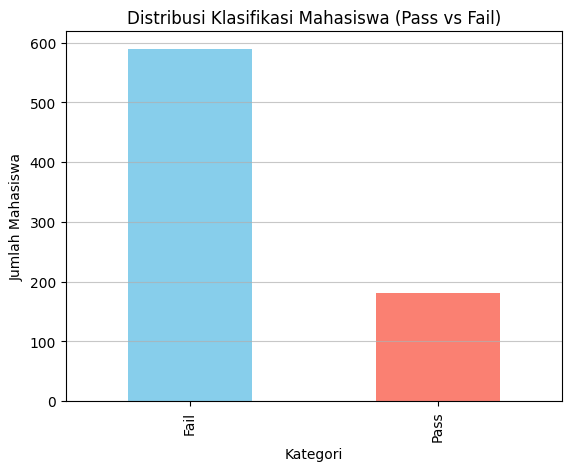

LABEL
Fail    589
Pass    181
Name: count, dtype: int64

In [27]:
df_grouped['LABEL'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Klasifikasi Mahasiswa (Pass vs Fail)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Mahasiswa')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

df_grouped['LABEL'].value_counts()

Penjelasan :

- Dari output dapat dilihat baik dalam bentuk angka ataupun visualisasi barplot distribusi Label Klasifikasi Mahasiswa (Pass vs Fail), bahwa sebagian besar mahasiswa termasuk dalam kategori Fail, yaitu sebanyak 589 karena tidak memenuhi kriteria kelulusan. Sedangkan sisanya sebanyak 181 mahasiswa masuk dalam kategori Pass yang memenuhi kriteria.

---

4. Menampilkan Dataframe Setelah Menambahkan Kolom `Label`

In [28]:
df_grouped.head()

,NIM,SKS,GRADE,LABEL
0,8429,145,"[B-, C, B+, B-, A, A, B+, B, A, A-, C, A, A-, ...",Fail
1,8455,136,"[C+, A, A-, D, A-, C, A, B+, C, B, B-, B+, B, ...",Fail
2,8481,127,"[C, C+, B-, D, B-, C+, A, B, B+, B-, B+, C, C,...",Fail
3,8631,145,"[A-, B+, A, C, A, A, B-, A-, A, B+, A-, B-, A,...",Pass
4,8684,145,"[A-, B-, A, B, A-, A-, B+, A-, A, B, A, B-, A,...",Pass


Penjelasan :

- Output diatas dapat dilihat bahwa kolom `LABEL` berhasil dibuat berdasarkan kriteria kelulusan dan telah dimasukkan kedalam dataframe `df_grouped`.

---

#### - Label Encoding Kolom `LABEL` Sebagai Persiapan Pemilihan Target (y)

Penjelasan :

- Label encoding pada kolom `LABEL` merupakan salah satu langkah persiapan untuk pemodelan. Alasannya karena algoritma pemodelan Machine Learning hanya dapat memproses dan bekerja dengan data numerik. Sedangkan kolom LABEL merupakan teks (Fail/Pass). 

- Oleh karena itu, label (Fail/Pass) pada kolom `LABEL` tersebut diubah menjadi numerik, yaitu 0 dan 1.

---

1. Proses Encoding Kolom `LABEL` Menggunakan Library Sklearn

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_grouped['Label_Encoded'] = le.fit_transform(df_grouped['LABEL'])
df_grouped['LABEL'] = df_grouped['Label_Encoded']
df_grouped = df_grouped.drop('Label_Encoded', axis=1)

2. Menampilkan Keterangan label setelah dilakukan Encoding

In [30]:
print("Keterangan isi pada Kolom 'Label' setelah encoding:")
for i, original_label in enumerate(le.classes_):
    print(f"{original_label} -> {i}")

Keterangan isi pada Kolom 'Label' setelah encoding:
Fail -> 0
Pass -> 1


3. Memperbaharui DataFrame setelah melakukan encoding Kolom `Label`

In [31]:
df_grouped.head()

,NIM,SKS,GRADE,LABEL
0,8429,145,"[B-, C, B+, B-, A, A, B+, B, A, A-, C, A, A-, ...",0
1,8455,136,"[C+, A, A-, D, A-, C, A, B+, C, B, B-, B+, B, ...",0
2,8481,127,"[C, C+, B-, D, B-, C+, A, B, B+, B-, B+, C, C,...",0
3,8631,145,"[A-, B+, A, C, A, A, B-, A-, A, B+, A-, B-, A,...",1
4,8684,145,"[A-, B-, A, B, A-, A-, B+, A-, A, B, A, B-, A,...",1


Penjelasan :

- Dari output diatas kita bisa lihat bahwa kolom `Label` berhasil di encoding dengan keterangan :

    - Fail -> diubah menjadi = 0 
    - Pass -> diubah menjadi = 1

- Sehingga kolom `Label` sudah siap untuk pemodelan sebagai Target (y)

---

#### 3d. Divide training and testing data with a portion of 70:30

1. Menentukan fitur (X) dan target (y)

In [32]:
X = df_grouped[['SKS']]
y = df_grouped['LABEL']

2. Split data menjadi training (70%) dan testing (30%)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

3. Cek hasil pembagian (Jumlah Data)

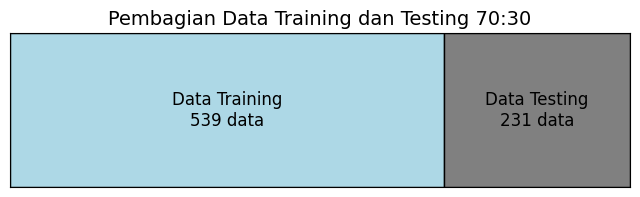

In [34]:
train_size = len(X_train) / len(X) 
test_size = len(X_test) / len(X)

fig, ax = plt.subplots(figsize=(8, 2))
ax.broken_barh([(0, train_size), (train_size, test_size)], (0, 1), 
               facecolors=['lightblue', 'grey'], edgecolors='black')
ax.text(train_size / 2, 0.5, 'Data Training\n{:.0f} data'.format(len(X_train)), 
        ha='center', va='center', fontsize=12)
ax.text(train_size + test_size / 2, 0.5, 'Data Testing\n{:.0f} data'.format(len(X_test)), 
        ha='center', va='center', fontsize=12)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Pembagian Data Training dan Testing 70:30", fontsize=14)
plt.show()

4. Cek hasil pembagian (Persentase Pembagian Data)

In [35]:
print("Persentase pembagian data:\n")
print(f"Training: {X_train.shape[0]/len(X)*100:.1f}%")
print(f"Testing:  {X_test.shape[0]/len(X)*100:.1f}%")

Persentase pembagian data:

Training: 70.0%
Testing:  30.0%


5. Cek hasil pembagian (Distribusi Data)

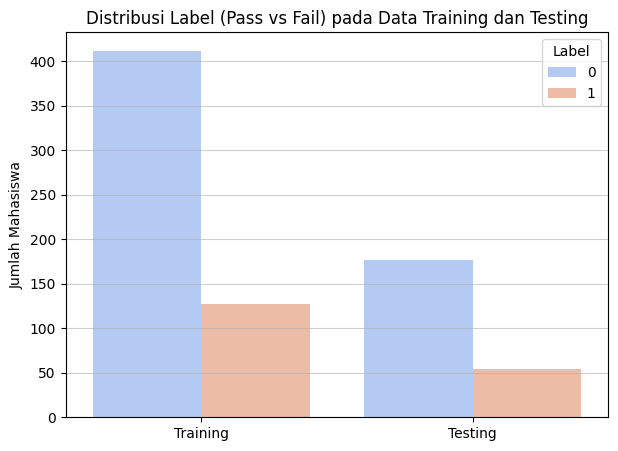

Distribusi data training:
LABEL
0    0.764378
1    0.235622
Name: proportion, dtype: float64

Distribusi data testing:
LABEL
0    0.766234
1    0.233766
Name: proportion, dtype: float64


In [36]:
import seaborn as sns
import pandas as pd

train_labels = y_train.value_counts().reset_index()
train_labels.columns = ['Label', 'Jumlah']
train_labels['Dataset'] = 'Training'

test_labels = y_test.value_counts().reset_index()
test_labels.columns = ['Label', 'Jumlah']
test_labels['Dataset'] = 'Testing'

combined = pd.concat([train_labels, test_labels])

plt.figure(figsize=(7,5))
sns.barplot(data=combined, x='Dataset', y='Jumlah', hue='Label', palette='coolwarm')
plt.title('Distribusi Label (Pass vs Fail) pada Data Training dan Testing')
plt.ylabel('Jumlah Mahasiswa')
plt.xlabel('')
plt.legend(title='Label')
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.show()

print("Distribusi data training:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi data testing:")
print(y_test.value_counts(normalize=True))


**Keterangan :**

- 0 -> Fail
- 1 -> Pass



Penjelasan :

- Dari hasil pembagian jumlah data, persentase pembagian data, dan distribusi data
- Dapat disimpulkan bahwa data `berhasil` dilakukan split dengan proporsi **data training (70%)** dan **data testing (30%)**.

---

#### 3e. Use a classification algorithm (free to use one)

Menggunakan Algoritma `Decision Tree Classifier`

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=5
)

model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
y_pred = model.predict(X_test)

#### 3f. Perform model evaluation

1. Accuracy Score dan Clasification Report

In [39]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))

Accuracy Score: 0.7532

Classification Report:
               precision    recall  f1-score   support

        Fail       0.96      0.71      0.81       177
        Pass       0.49      0.91      0.63        54

    accuracy                           0.75       231
   macro avg       0.72      0.81      0.72       231
weighted avg       0.85      0.75      0.77       231



Penjelasan :

- Berdasarkan output Accuracy Score dan Classification Report, dapat dilihat bahwa model memiliki akurasi sebesar 75,32%, yang berarti masih terdapat kesalahan prediksi pada sekitar seperempat data uji. 
- Kelas Fail memiliki tingkat ketepatan tinggi (precision 0,96) namun tidak semua kasus berhasil dikenali (recall 0,71), sedangkan kelas Pass memiliki kemampuan mengenali tinggi (recall 0,91) namun ketepatan prediksinya rendah (precision 0,49). 
- Secara keseluruhan, model menunjukkan kinerja cukup baik, tetapi `masih sering salah dalam memprediksi` kelas Pass.

---

2. Visualisasi Pohon Keputusan

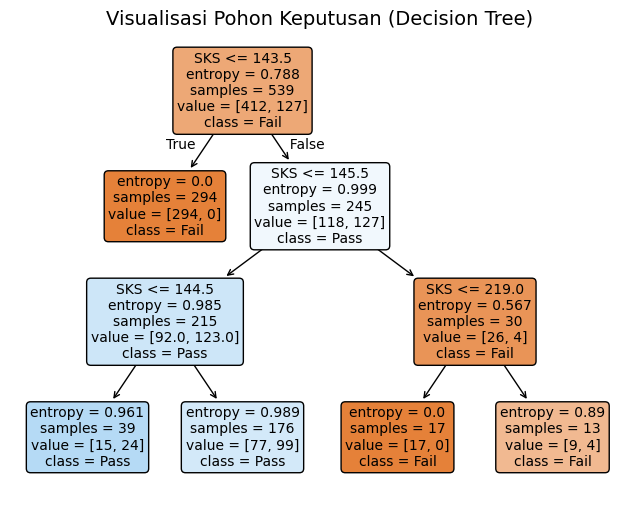

In [40]:
from sklearn.tree import plot_tree

feature_names = X.columns.tolist()
class_names = ['Fail', 'Pass']

plt.figure(figsize=(8,6))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)", fontsize=14)
plt.show()

Penjelasan :

- Berdasarkan hasil visualisasi pohon keputusan dapat dilihat model memisahkan data hanya berdasarkan variabel `SKS`, dengan batas utama **SKS ≤ 143.5** untuk mengklasifikasikan mahasiswa sebagai **Fail**, dan nilai di atasnya cenderung Pass. 
- Struktur pohon yang sederhana menunjukkan bahwa model `hanya bergantung pada satu fitur`, sehingga kemampuan prediksinya terbatas. 
- Akibatnya, model menjadi kurang akurat dan tidak mampu menangkap faktor lain yang mungkin memengaruhi hasil akhir, karena hanya kolom SKS yang digunakan sebagai fitur (X) dalam pelatihan. 
- Oleh karena itu, ditemukan solusi dari permaslahan ini yaitu membutuhkan tambahan kolom tambahan untuk Fitur (X) selain menggunakan kolom SKS dalam pemodelan.


---

3. Confusion Matrix

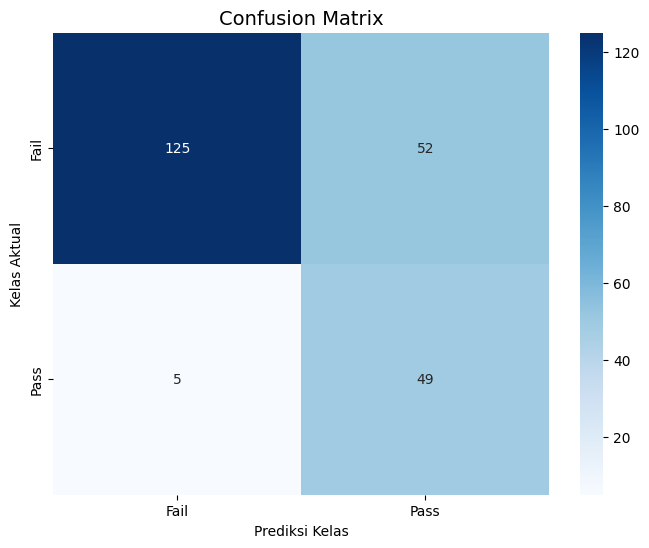

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_names = ['Fail', 'Pass']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel('Prediksi Kelas')
plt.ylabel('Kelas Aktual')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Penjelasan :

- Berdasarkan hasil `Confusion Matrix` dapat menunjukkan bahwa model berhasil memprediksi beberapa data dengan benar. Namun, yang perlu diperhatikan bahwa masih ada banyak data yang salah diprediksi sebagai oleh model, yaitu 52. 
- Hal ini menunjukkan bahwa `model masih banyak keliru dalam memprediksi`, sehingga performanya cenderung kurang seimbang antar kelas. 
- Kesalahan ini juga sejalan dengan hasil Clasification Report sebelumnya, di mana model memiliki precision rendah pada kelas Pass, menandakan bahwa model masih sulit membedakan kedua kelas dengan baik.


---

#### - Membuat Pemodelan Baru Dengan Penambahan Pada Fitur (X) `(Tambahan)`

Berdasarkan hasil evaluasi pemodelan diatas dimana dalam pemilihan fitur (X) hanya menggunakan kolom `SKS` dan target (y) menggunakan kolom `LABEL` untuk membangun model prediksi kelulusan mahasiswa. Ternyata model yang dihasilkan tidak memuaskan, karena model banyak keliru dalam memprediksi. 

Penyebab masalah ini ditemukan saat melihat visualisasi Decision Tree, ternyata jika hanya menggunakan SKS atau hanya ada 1 dalam fitur (X) membuat kemampuan model dalam memprediksi menjadi terbatas sehingga menjadi tidak akurat. Karena secara logika, model hanya menentukan mahasiswa lolos atau tidak berdasarkan jumlah SKS saja, tanpa berdasarkan Grade.

Perlu diingat juga bahwa kriteria kelulusan mahasiswa adalah minimal total SKS >= 144 dan tidak ada Grade D, E, and F. Dalam membangun model, kita sudah menggunakan SKS, namun ternyata belum membuat kriteria berdasarkan GRADE. 

Oleh karena itu, proses berikutnya adalah pembuatan model baru dengan menambahkan kolom baru bernama `Jml_Nilai_Fail` yang memberikan informasi berapa jumlah Grade/Nilai yang tidak lulus (D, E, F) untuk **ditambahkan** kedalam Fitur (X) untuk menentukan mahasiswa tersebut lolos atau tidak. 

---

#### - Membuat Fitur Baru `Jml_Nilai_Pass` sebagai tambahan untuk Fitur (X) `(Tambahan)`

1. Membuat Fungsi untuk menghitung nilai Fail (D, E, F)

In [42]:
def count_deficient_grades(grade_list):
    deficient_grades = ['D', 'E', 'F']
    count = 0
    if isinstance(grade_list, list):
        for grade in grade_list:
            if any(g in grade for g in deficient_grades):
                count += 1
    return count

Penjelasan :

- Fungsi diatas dibangun untuk menghitung jumlah nilai yang gagal (D, E, F) pada data.

---

2. Membuat Kolom baru `Jml_Nilai_Fail`

In [43]:
df_grouped['Jml_Nilai_Fail'] = df_grouped['GRADE'].apply(count_deficient_grades)

3. Menampilkan DataFrame terbaru dengan Kolom `Jml_Nilai_Fail`

In [44]:
df_grouped[['NIM', 'SKS', 'Jml_Nilai_Fail', 'LABEL']].head()

,NIM,SKS,Jml_Nilai_Fail,LABEL
0,8429,145,1,0
1,8455,136,2,0
2,8481,127,7,0
3,8631,145,0,1
4,8684,145,0,1


In [45]:
df_grouped.head()

,NIM,SKS,GRADE,LABEL,Jml_Nilai_Fail
0,8429,145,"[B-, C, B+, B-, A, A, B+, B, A, A-, C, A, A-, ...",0,1
1,8455,136,"[C+, A, A-, D, A-, C, A, B+, C, B, B-, B+, B, ...",0,2
2,8481,127,"[C, C+, B-, D, B-, C+, A, B, B+, B-, B+, C, C,...",0,7
3,8631,145,"[A-, B+, A, C, A, A, B-, A-, A, B+, A-, B-, A,...",1,0
4,8684,145,"[A-, B-, A, B, A-, A-, B+, A-, A, B, A, B-, A,...",1,0


Penjelasan : 

- Dari output diatas kita bisa lihat bahwa kolom `Jml_Nilai_Fail` berhasil dibuat. 

- Bisa langsung dilihat contohnya, mahasiswa dengan NIM 8429. Pada kolom Jml_Nilai_Fail nya ada 1 dan SKS nya 145 (sudah sesuai dengan salah satu kriteria kelulusan) dan ternyata memang benar pada Label dia dinyatakan **Fail / 0** karena mahasiswa tersebut diketahui masih ada nilai yang D, E, F.

- Berbeda dengan mahasiswa NIM 8631 dengan jumlah SKS 145 dan kolom Jml_Nilai_Fail nya 0. Pada label dia dinyatakan **Pass / 1** karena secara kriteria sks dan grade nya telah memenuhi untuk kelulusan.

- Dengan berhasilnya pembuatan kolom `Jml_Nilai_Fail`, maka dapat dilanjutkan proses membangun model dengan menentukan Fitur (X) dan Target (y).

---

#### 3d. Divide training and testing data with a portion of 70:30

1. Menentukan Fitur (X) dan Target (y) terbaru & Split Data 70:30

In [46]:
X_new = df_grouped[['SKS', 'Jml_Nilai_Fail']]
y_new = df_grouped['LABEL']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42, stratify=y)

2. Cek hasil pembagian (Jumlah Data)

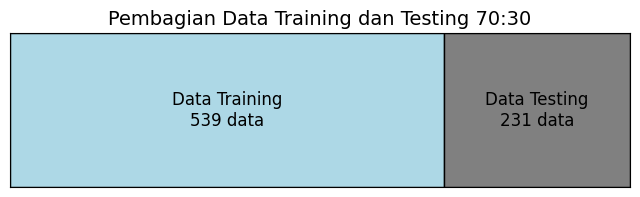

In [47]:
train_size = len(X_train_new) / len(X_new) 
test_size = len(X_test_new) / len(X_new)

fig, ax = plt.subplots(figsize=(8, 2))
ax.broken_barh([(0, train_size), (train_size, test_size)], (0, 1), 
               facecolors=['lightblue', 'grey'], edgecolors='black')
ax.text(train_size / 2, 0.5, 'Data Training\n{:.0f} data'.format(len(X_train_new)), 
        ha='center', va='center', fontsize=12)
ax.text(train_size + test_size / 2, 0.5, 'Data Testing\n{:.0f} data'.format(len(X_test_new)), 
        ha='center', va='center', fontsize=12)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Pembagian Data Training dan Testing 70:30", fontsize=14)
plt.show()

3. Cek hasil pembagian (Persentase Pembagian Data)

In [48]:
print("Persentase pembagian data:\n")
print(f"Training: {X_train_new.shape[0]/len(X_new)*100:.1f}%")
print(f"Testing:  {X_test_new.shape[0]/len(X_new)*100:.1f}%")

Persentase pembagian data:

Training: 70.0%
Testing:  30.0%


4. Cek hasil pembagian (Distribusi Data)

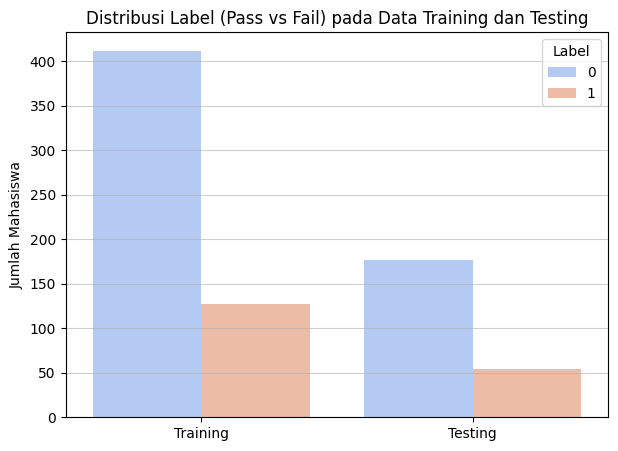

Distribusi data training:
LABEL
0    0.764378
1    0.235622
Name: proportion, dtype: float64

Distribusi data testing:
LABEL
0    0.766234
1    0.233766
Name: proportion, dtype: float64


In [49]:
import seaborn as sns
import pandas as pd

train_labels = y_train_new.value_counts().reset_index()
train_labels.columns = ['Label', 'Jumlah']
train_labels['Dataset'] = 'Training'

test_labels = y_test_new.value_counts().reset_index()
test_labels.columns = ['Label', 'Jumlah']
test_labels['Dataset'] = 'Testing'

combined = pd.concat([train_labels, test_labels])

plt.figure(figsize=(7,5))
sns.barplot(data=combined, x='Dataset', y='Jumlah', hue='Label', palette='coolwarm')
plt.title('Distribusi Label (Pass vs Fail) pada Data Training dan Testing')
plt.ylabel('Jumlah Mahasiswa')
plt.xlabel('')
plt.legend(title='Label')
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.show()

print("Distribusi data training:")
print(y_train_new.value_counts(normalize=True))
print("\nDistribusi data testing:")
print(y_test_new.value_counts(normalize=True))

**Keterangan :**

- 0 -> Fail
- 1 -> Pass

---

#### 3e. Use a classification algorithm (free to use one)

Menggunakan Algoritma `Decision Tree Classifier`

In [50]:
from sklearn.tree import DecisionTreeClassifier

model_new = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=5
)

model_new.fit(X_train_new, y_train_new)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
y_pred_new = model_new.predict(X_test_new)

#### 3f. Perform model evaluation

1. Accuracy Score dan Clasification Report

In [52]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score_new = accuracy_score(y_test_new, y_pred_new)
classification_report_new = classification_report(y_test_new, y_pred_new, 
                                                  target_names=['Fail', 'Pass'])

print("Accuracy Score:", accuracy_score_new)
print("\nClassification Report:\n", classification_report_new)

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      1.00      1.00       177
        Pass       1.00      1.00      1.00        54

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



Penjelasan :

- Hasil performa pemodelan menggunakan Decision Tree menunjukkan performa yang sempurna pada data pengujian, dengan akurasi dan semua metrik lainnya mencapai 1.00 (100%).

- Artinya seluruh prediksi yang dibuat oleh model pada data testing adalah benar. Model tidak membuat satu pun kesalahan klasifikasi (Fail yang diprediksi Pass atau Pass yang diprediksi Fail).

- Pada umumnya akurasi mencapai 100% menandakan potensi overfitting, namun jika dilihat pada case saat ini tidak overfitting karena adanya hubungan logis yang sangat kuat antara fitur (X) yang telah buat dan dengan target (y) labelnya. 

- Karena fitur (X) (kolom `Jml_Nilai_Fail dan SKS`) merupakan aturan yang sama dalam pembuatan `LABEL` (y) yang telah tetapkan, model algoritma Decision Tree dapat dengan mudah menemukan aturan pemisahan tersebut sehingga mencapai kinerja sempurna.

- Aturan dalam pembuatan kolom label adalah total SKS minimal 144 atau lebih dan tidak ada Grade D,E,F. Logika dalam pembuatan kolom `Jml_Nilai_Fail` pun jika ada grade D, E, F maka otomatis langsung terhitung Fail. Logika antar kolom ini yang saling berhubungan membuat model menjadi mudah dalam menentukan mahasiswa tersebut Fail / Pass.

---

2. Visualisasi Pohon Keputusan

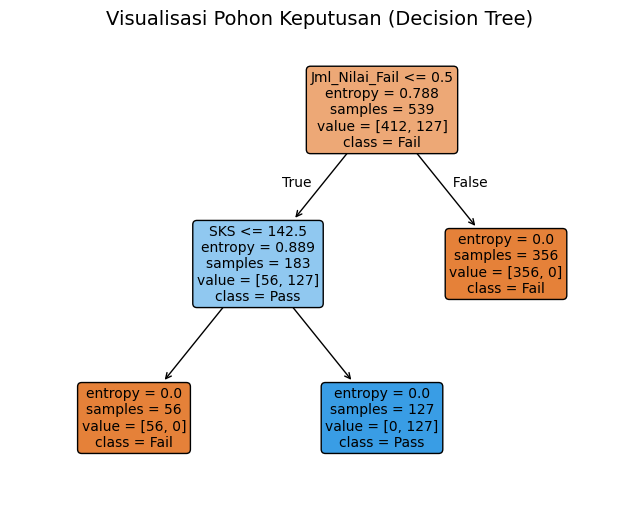

In [53]:
from sklearn.tree import plot_tree

feature_names = X_new.columns.tolist()
class_names = ['Fail', 'Pass']

plt.figure(figsize=(8,6))
plot_tree(
    model_new,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)", fontsize=14)
plt.show()

Penjelasan :

- Visualisasi pohon ini menjelaskan logika yang digunakan model untuk mencapai kinerja sempurna tersebut. 
- Model tersebut menemukan aturan pemisahan yang sama persis dengan kriteria kelulusan yang telah ditentukan. 
- Dapat dilihat juga dalam visualisasi, ternyata kolom yang baru dibuat yaitu `Jml_Nilai_Fail` ditemukan sebagai fitur pemisah yang paling penting dalam pemodelan.

---

3. Confusion Matrix

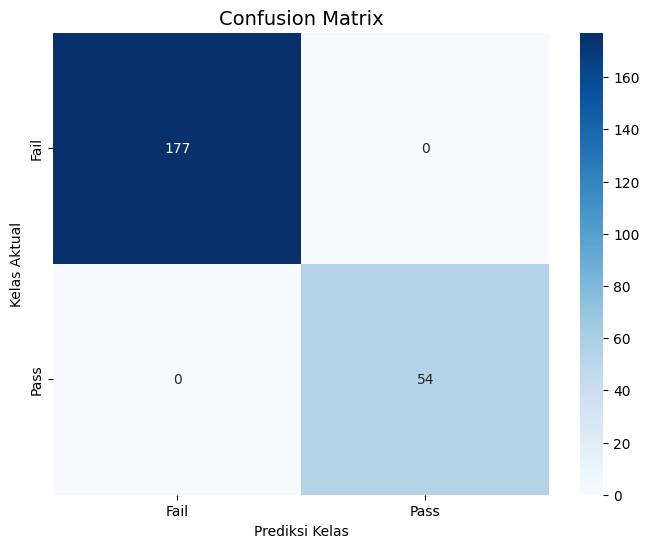

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_new, y_pred_new)
class_names = ['Fail', 'Pass']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel('Prediksi Kelas')
plt.ylabel('Kelas Aktual')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Penjelasan :

- Berdasarkan hasil Confusion Matrix tersebut, model berhasil memprediksi semua data dengan benar, yaitu 177 data Fail dan 54 data Pass, tanpa ada kesalahan klasifikasi sama sekali. 
- Artinya, tidak terdapat False Positive maupun False Negative setelah menggunakan `Jml_Nilai_Fail`, sehingga model mencapai akurasi 100%.

---

#### - Perbandingan Evaluasi Hasil Pemodelan `(Tambahan)`

1. Accuracy Score

C:\Users\JFKevin\AppData\Local\Temp\ipykernel_6716\3582195823.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


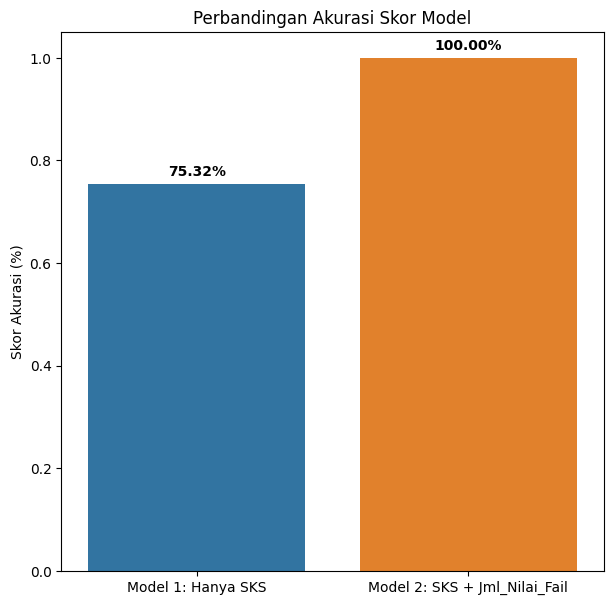

In [55]:
accuracy_model1 = accuracy_score(y_test, y_pred)
accuracy_model2 = accuracy_score_new

data = {'Model': ['Model 1: Hanya SKS','Model 2: SKS + Jml_Nilai_Fail'], 
        'Accuracy': [accuracy_model1, accuracy_model2]}
df_accuracy = pd.DataFrame(data)

plt.figure(figsize=(7, 7)) 
barplot = sns.barplot(
    x='Model', 
    y='Accuracy', 
    data=df_accuracy, 
    palette=['#1f77b4', '#ff7f0e']
)

for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height()*100:.2f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 9),
        textcoords = 'offset points',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Perbandingan Akurasi Skor Model')
plt.ylabel('Skor Akurasi (%)', fontsize=10)
plt.xlabel('')
plt.show()

2. Classification Report

In [56]:
print("\nModel 1 (Hanya Menggunakan SKS) :\n", classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))
print("\nModel 2 (SKS + Jml_Nilai_Fail) :\n", classification_report_new)


Model 1 (Hanya Menggunakan SKS) :
               precision    recall  f1-score   support

        Fail       0.96      0.71      0.81       177
        Pass       0.49      0.91      0.63        54

    accuracy                           0.75       231
   macro avg       0.72      0.81      0.72       231
weighted avg       0.85      0.75      0.77       231


Model 2 (SKS + Jml_Nilai_Fail) :
               precision    recall  f1-score   support

        Fail       1.00      1.00      1.00       177
        Pass       1.00      1.00      1.00        54

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



3. Confusion Matrix

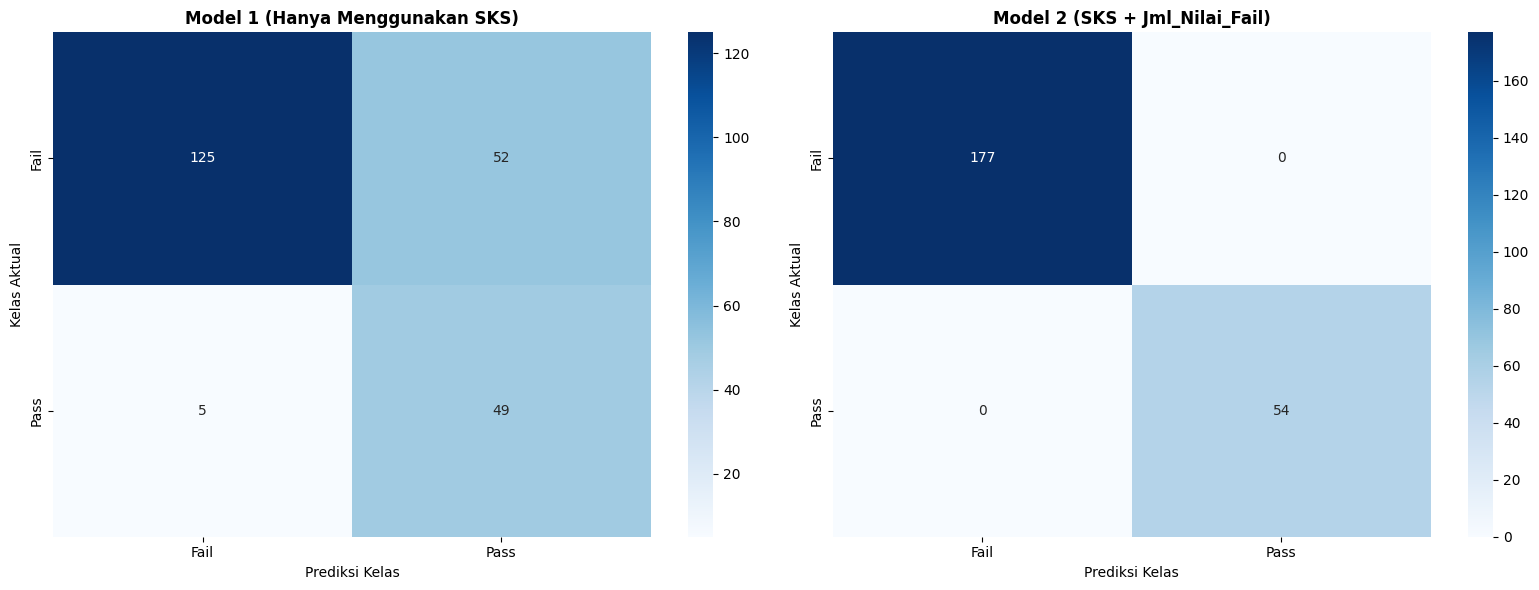

In [57]:
cm_model1 = confusion_matrix(y_test, y_pred)         
cm_model2 = confusion_matrix(y_test_new, y_pred_new) 
class_names = le.classes_

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.heatmap(
    cm_model1, annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names,
    ax=axes[0]
)
axes[0].set_title('Model 1 (Hanya Menggunakan SKS)', fontsize=12, weight='bold')
axes[0].set_xlabel('Prediksi Kelas')
axes[0].set_ylabel('Kelas Aktual')

sns.heatmap(
    cm_model2, annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names,
    ax=axes[1]
)
axes[1].set_title('Model 2 (SKS + Jml_Nilai_Fail)', fontsize=12, weight='bold')
axes[1].set_xlabel('Prediksi Kelas')
axes[1].set_ylabel('Kelas Aktual')

plt.tight_layout() 
plt.show()

Penjelasan :

- Setelah dilakukannya perbandingan evaluasi model `(Accuracy Score, Clasification Report, Confusion Matrix)`, kita bisa melihat perbedaan jelas antara 2 model yang telah dibangun. Model 1 hanya menggunakan SKS dalam fitur (X) membuat performa model dalam memprediksi menjadi terbatas karena hanya menentukan mahasiswa lolos atau tidak berdasarkan jumlah SKS saja, tanpa berdasarkan Grade, sehingga membuat model jadi tidak akurat (salah memprediksi). 

- Sedangkan model 2 dibangun menggunakan kolom SKS ditambah dengan kolom baru yang dibuat yaitu `Jml_Nilai_Fail` untuk mengetahui apakah ada/tidak Grade yang tidak lulus pada mahasiswa digunakan dalam fitur (X) menjadikannya kombinasi yang sempurna dalam membangun model untuk memprediksi kelulusan mahasiswa (Target / y). 

- Dalam model 2 juga ditemukan latar belakang, mengapa akurasi mencapai 100% dan tidak ada data yang salah prediksi. Karena antara fitur (X) yang berisikan `SKS dan Jml_Nilai_Fail` dan target (y) yang berisikan `LABEL` menunjukkan relasi atau hubungan yang kuat karena kolom SKS dan Jml_Nilai_Fail dibangun untuk menentukan kriteria kelulusan mahasiswa tersebut. Kolom LABEL pun klasifikasinya dibuat sesuai dengan kriteria kelulusan **(ada pada nomor 3c)**. Dengan adanya kombinasi tersebut membuat model menjadi mudah dalam memprediksi karena tidak hanya berdasarkan 1 kriteria saja.

---

Uji Coba Mengambil 10 Sampel Acak Dari Data Testing Untuk Prediksi

In [58]:
sample_data = X_test_new.sample(10, random_state=42)
sample_indices = sample_data.index
sample_data = sample_data[['SKS', 'Jml_Nilai_Fail']]

predicted_labels_encoded = model_new.predict(sample_data)
actual_labels_encoded = y_test.loc[sample_indices]

classification_map = {0: le.classes_[0], 1: le.classes_[1]}

sample_data['Label_Aktual'] = actual_labels_encoded.map(classification_map)
sample_data['Label_Prediksi'] = pd.Series(
    predicted_labels_encoded,
    index=sample_data.index
).map(classification_map)

print("10 Sampel Data Testing dengan Hasil Prediksi:")
sample_data


10 Sampel Data Testing dengan Hasil Prediksi:


,SKS,Jml_Nilai_Fail,Label_Aktual,Label_Prediksi
651,144,0,Pass,Pass
637,144,0,Pass,Pass
545,145,1,Fail,Fail
230,82,4,Fail,Fail
267,69,5,Fail,Fail
573,144,1,Fail,Fail
652,144,2,Fail,Fail
324,40,0,Fail,Fail
564,145,0,Pass,Pass
714,134,3,Fail,Fail
